# Proyek Analisis Data: **Memprediksi risiko kredit (credit risk)**

## Import Semua Packages/Library yang Digunakan

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier

In [50]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Data Wrangling

### Gathering Data

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
files_dir = os.listdir("/content/drive/MyDrive/Rakamin Internship/Final Case")
print(files_dir)

['Final Case.pdf', 'loan_data_2007_2014.csv', 'Salinan dari [Make a Copy] Template Final Task IDX DS.gslides', 'notebook.ipynb', 'notebook_2.ipynb']


In [53]:
pd.set_option('display.max_columns', 75)
data = pd.read_csv("/content/drive/MyDrive/Rakamin Internship/Final Case/loan_data_2007_2014.csv")
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Assessing Data

In [54]:
print("============ Total Ukuran ============ ")
data.shape

============ Total Ukuran ============ 


(466285, 75)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [56]:
list_null_percentage = []

for col in data.columns:
  if data[col].isnull().sum() != 0:
    null_percentage = ((data[col].isnull().sum()) / len(data)) * 100
    list_null_percentage.append([col, null_percentage])

list_null_percentage.sort(key=lambda x: x[1], reverse=True)

print("============ Data Null Percent from 466285 row data ============ \n")
for i in list_null_percentage:
  print(f'{i[0]} : {i[1]:.3f}%')

============ Data Null Percent from 466285 row data ============ 

annual_inc_joint : 100.000%
dti_joint : 100.000%
verification_status_joint : 100.000%
open_acc_6m : 100.000%
open_il_6m : 100.000%
open_il_12m : 100.000%
open_il_24m : 100.000%
mths_since_rcnt_il : 100.000%
total_bal_il : 100.000%
il_util : 100.000%
open_rv_12m : 100.000%
open_rv_24m : 100.000%
max_bal_bc : 100.000%
all_util : 100.000%
inq_fi : 100.000%
total_cu_tl : 100.000%
inq_last_12m : 100.000%
mths_since_last_record : 86.567%
mths_since_last_major_derog : 78.774%
desc : 72.982%
mths_since_last_delinq : 53.691%
next_pymnt_d : 48.729%
tot_coll_amt : 15.071%
tot_cur_bal : 15.071%
total_rev_hi_lim : 15.071%
emp_title : 5.917%
emp_length : 4.505%
last_pymnt_d : 0.081%
revol_util : 0.073%
collections_12_mths_ex_med : 0.031%
last_credit_pull_d : 0.009%
delinq_2yrs : 0.006%
earliest_cr_line : 0.006%
inq_last_6mths : 0.006%
open_acc : 0.006%
pub_rec : 0.006%
total_acc : 0.006%
acc_now_delinq : 0.006%
title : 0.005%
annual_

In [57]:
def look_object_in_data(data):
  list_data_object = data.select_dtypes(include=['object']).columns.tolist()

  for obj in list_data_object:
      print(f'{obj} : {data[obj].unique()}')

In [58]:
look_object_in_data(data)

term : [' 36 months' ' 60 months']
grade : ['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade : ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
emp_title : [nan 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']
emp_length : ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
home_ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status : ['Verified' 'Source Verified' 'Not Verified']
issue_d : ['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-

### Cleaning Data

#### Encode Risk Label

In [59]:
risk_mapping = {
        'Fully Paid': 0,  # Good
        'Current': 0,     # Good
        'Charged Off': 1, # Bad
        'Default': 1,     # Bad
        'Late (31-120 days)': 1,  # Bad
        'Late (16-30 days)': 1,   # Bad
        'In Grace Period': 1,     # Bad
        'Does not meet the credit policy. Status:Fully Paid': 0,  # Good
        'Does not meet the credit policy. Status:Charged Off': 1  # Bad
    }

data['risk_label'] = data['loan_status'].map(risk_mapping)

# Handle any unmapped values
if data['risk_label'].isnull().any():
    print("Warning: Some loan statuses couldn't be mapped!")
    print(data[data['risk_label'].isnull()]['loan_status'].value_counts())

#### Drop Kolom

In [60]:
columns_to_drop = [
    'Unnamed: 0',
    'id',
    'member_id',
    'emp_title',
    'issue_d',
    'url',
    'desc',
    'title',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'mths_since_last_record',
    'mths_since_last_major_derog',
    'mths_since_last_delinq',
    'next_pymnt_d',
    'last_pymnt_d',
    'last_credit_pull_d',
    'earliest_cr_line',
    'initial_list_status',
    'last_credit_pull_d',
    'application_type',
    'zip_code',
    'pymnt_plan',
    'policy_code'
]

data.drop(columns=columns_to_drop, inplace=True)

#### Fill kolom


In [61]:
# 15% missing
impute_cols_median = ['tot_coll_amt',
                      'tot_cur_bal',
                      'total_rev_hi_lim']

for col in impute_cols_median:
    data[col] = data[col].fillna(data[col].median())

# 5-6% missing
impute_cols_mode = ['emp_length',
                    'revol_util']

for col in impute_cols_mode:
    data[col] = data[col].fillna(data[col].mode()[0])

# < 1% missing
impute_cols_misc = ['collections_12_mths_ex_med',
                    'delinq_2yrs',
                    'inq_last_6mths',
                    'open_acc',
                    'pub_rec',
                    'total_acc',
                    'acc_now_delinq',
                    'annual_inc']

for col in impute_cols_misc:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].median())

In [62]:
data.dropna(inplace=True)

In [63]:
data.drop_duplicates(inplace=True)

### Pengecekan Kembali

In [64]:
data.shape

(466285, 39)

In [65]:
pd.set_option('display.max_columns', 42)
data.sample(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,risk_label
400583,20000,20000,19900.0,36 months,12.49,668.98,B,B4,3 years,OWN,48000.0,Verified,Current,credit_card,WI,29.25,0.0,1.0,7.0,0.0,22985,76.9,13.0,9812.92,9763.86,13379.60000,13312.70,10187.08,3192.52,0.0,0.0,0.0,668.98,0.0,0.0,142.0,34924.0,29900.0,0
134573,1200,1200,1200.0,36 months,18.49,43.68,D,D2,5 years,RENT,38300.0,Not Verified,Current,debt_consolidation,NY,29.83,0.0,0.0,10.0,0.0,7239,72.4,16.0,208.59,208.59,1354.08000,1354.08,991.41,362.67,0.0,0.0,0.0,43.68,0.0,0.0,0.0,47405.0,10000.0,0
224604,3500,3500,3500.0,36 months,6.62,107.47,A,A2,8 years,MORTGAGE,96000.0,Not Verified,Fully Paid,car,NY,7.63,0.0,1.0,11.0,0.0,8765,18.9,19.0,0.00,0.00,3717.73000,3717.73,3500.00,217.73,0.0,0.0,0.0,2027.45,0.0,0.0,0.0,81539.0,22800.0,0
393676,15975,15975,15975.0,60 months,18.25,407.84,D,D3,10+ years,RENT,40000.0,Source Verified,Current,debt_consolidation,CA,28.35,0.0,0.0,5.0,0.0,29634,89.3,19.0,12154.39,12154.39,8194.43000,8194.43,3820.61,4373.82,0.0,0.0,0.0,445.47,0.0,0.0,0.0,29634.0,33200.0,0
229350,9450,9450,9450.0,36 months,12.42,315.78,B,B4,2 years,OWN,30000.0,Source Verified,Fully Paid,debt_consolidation,MN,24.64,0.0,0.0,8.0,0.0,26257,90.5,13.0,0.00,0.00,11365.29267,11365.29,9450.00,1915.29,0.0,0.0,0.0,324.74,0.0,0.0,0.0,81539.0,22800.0,0
169309,21325,21325,21325.0,60 months,21.98,588.74,E,E4,7 years,RENT,59000.0,Verified,Charged Off,debt_consolidation,NY,27.95,0.0,0.0,11.0,0.0,13263,77.1,27.0,0.00,0.00,5298.21000,5298.21,1919.46,3378.75,0.0,0.0,0.0,588.74,0.0,0.0,1227.0,85054.0,17200.0,1
208281,10000,10000,9975.0,36 months,10.16,323.43,B,B1,10+ years,MORTGAGE,62000.0,Not Verified,Fully Paid,major_purchase,FL,6.75,0.0,2.0,12.0,0.0,15373,36.8,26.0,0.00,0.00,11577.04882,11548.13,10000.00,1577.05,0.0,0.0,0.0,2542.67,0.0,0.0,0.0,81539.0,22800.0,0
104094,17625,17625,17625.0,36 months,8.90,559.66,A,A5,1 year,RENT,40000.0,Source Verified,Current,credit_card,CA,13.23,0.0,0.0,4.0,0.0,20475,71.1,14.0,3806.79,3806.79,16226.00000,16226.00,13818.21,2407.79,0.0,0.0,0.0,559.66,0.0,0.0,0.0,20475.0,28800.0,0
403117,11600,11600,11600.0,36 months,15.31,403.89,C,C4,3 years,MORTGAGE,44000.0,Verified,Current,debt_consolidation,TN,11.67,2.0,0.0,8.0,0.0,3192,34.0,18.0,5811.66,5811.66,8077.80000,8077.80,5788.34,2289.46,0.0,0.0,0.0,403.89,0.0,0.0,0.0,164718.0,9490.0,0
340291,15600,15600,15600.0,36 months,12.49,521.81,B,B5,7 years,MORTGAGE,43865.0,Not Verified,Current,debt_consolidation,TX,3.91,0.0,2.0,8.0,0.0,5932,43.6,19.0,8953.25,8953.25,8870.77000,8870.77,6646.75,2224.02,0.0,0.0,0.0,521.81,0.0,0.0,589.0,88977.0,13600.0,0


In [66]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt,466285.0,14291.801044,8274.371300,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt_inv,466285.0,14222.329888,8297.637788,0.00,8000.000000,12000.000000,19950.00000,3.500000e+04
int_rate,466285.0,13.829236,4.357587,5.42,10.990000,13.660000,16.49000,2.606000e+01
installment,466285.0,432.061201,243.485550,15.67,256.690000,379.890000,566.58000,1.409990e+03
annual_inc,466285.0,73277.293307,54963.341145,1896.00,45000.000000,63000.000000,88953.00000,7.500000e+06
dti,466285.0,17.218758,7.851121,0.00,11.360000,16.870000,22.78000,3.999000e+01
delinq_2yrs,466285.0,0.284661,0.797343,0.00,0.000000,0.000000,0.00000,2.900000e+01
inq_last_6mths,466285.0,0.804695,1.091583,0.00,0.000000,0.000000,1.00000,3.300000e+01
open_acc,466285.0,11.186995,4.987380,0.00,8.000000,10.000000,14.00000,8.400000e+01


In [67]:
list_null_percentage = []

for col in data.columns:
  if data[col].isnull().sum() != 0:
    null_percentage = ((data[col].isnull().sum()) / len(data)) * 100
    list_null_percentage.append([col, null_percentage])

list_null_percentage.sort(key=lambda x: x[1], reverse=True)

print("============ Data Null Percent from 466285 row data ============ \n")
for i in list_null_percentage:
  print(f'{i[0]} : {i[1]:.3f}%')

============ Data Null Percent from 466285 row data ============ 



In [68]:
look_object_in_data(data)

term : [' 36 months' ' 60 months']
grade : ['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade : ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
emp_length : ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']
home_ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status : ['Verified' 'Source Verified' 'Not Verified']
loan_status : ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
purpose : ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
addr_state : ['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX

## Exploratory Data Analysis (EDA)

In [69]:
plt.figure(figsize=(22, 18))
corr = data.select_dtypes(include=['float64', 'int64']).corr()

print("Correlation Matrix (rounded to 2 decimals):\n")
print(corr.round(2).to_string())

Correlation Matrix (rounded to 2 decimals):

                            loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  annual_inc   dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  risk_label
loan_amnt                        1.00         1.00             0.99      0.17         0.95        0.37  0.06         0.01           -0.02      0.20    -0.08       0.33        0.12       0.24       0.52           0.52         0.74             0.74             0.61           0.72                0.04        0.11                     0.08             0.30                       -0.01            0.01         -0.00         0.32              0.28        0.02
funded_amnt                      1.00         1

<Figure size 2200x1800 with 0 Axes>

<Axes: >

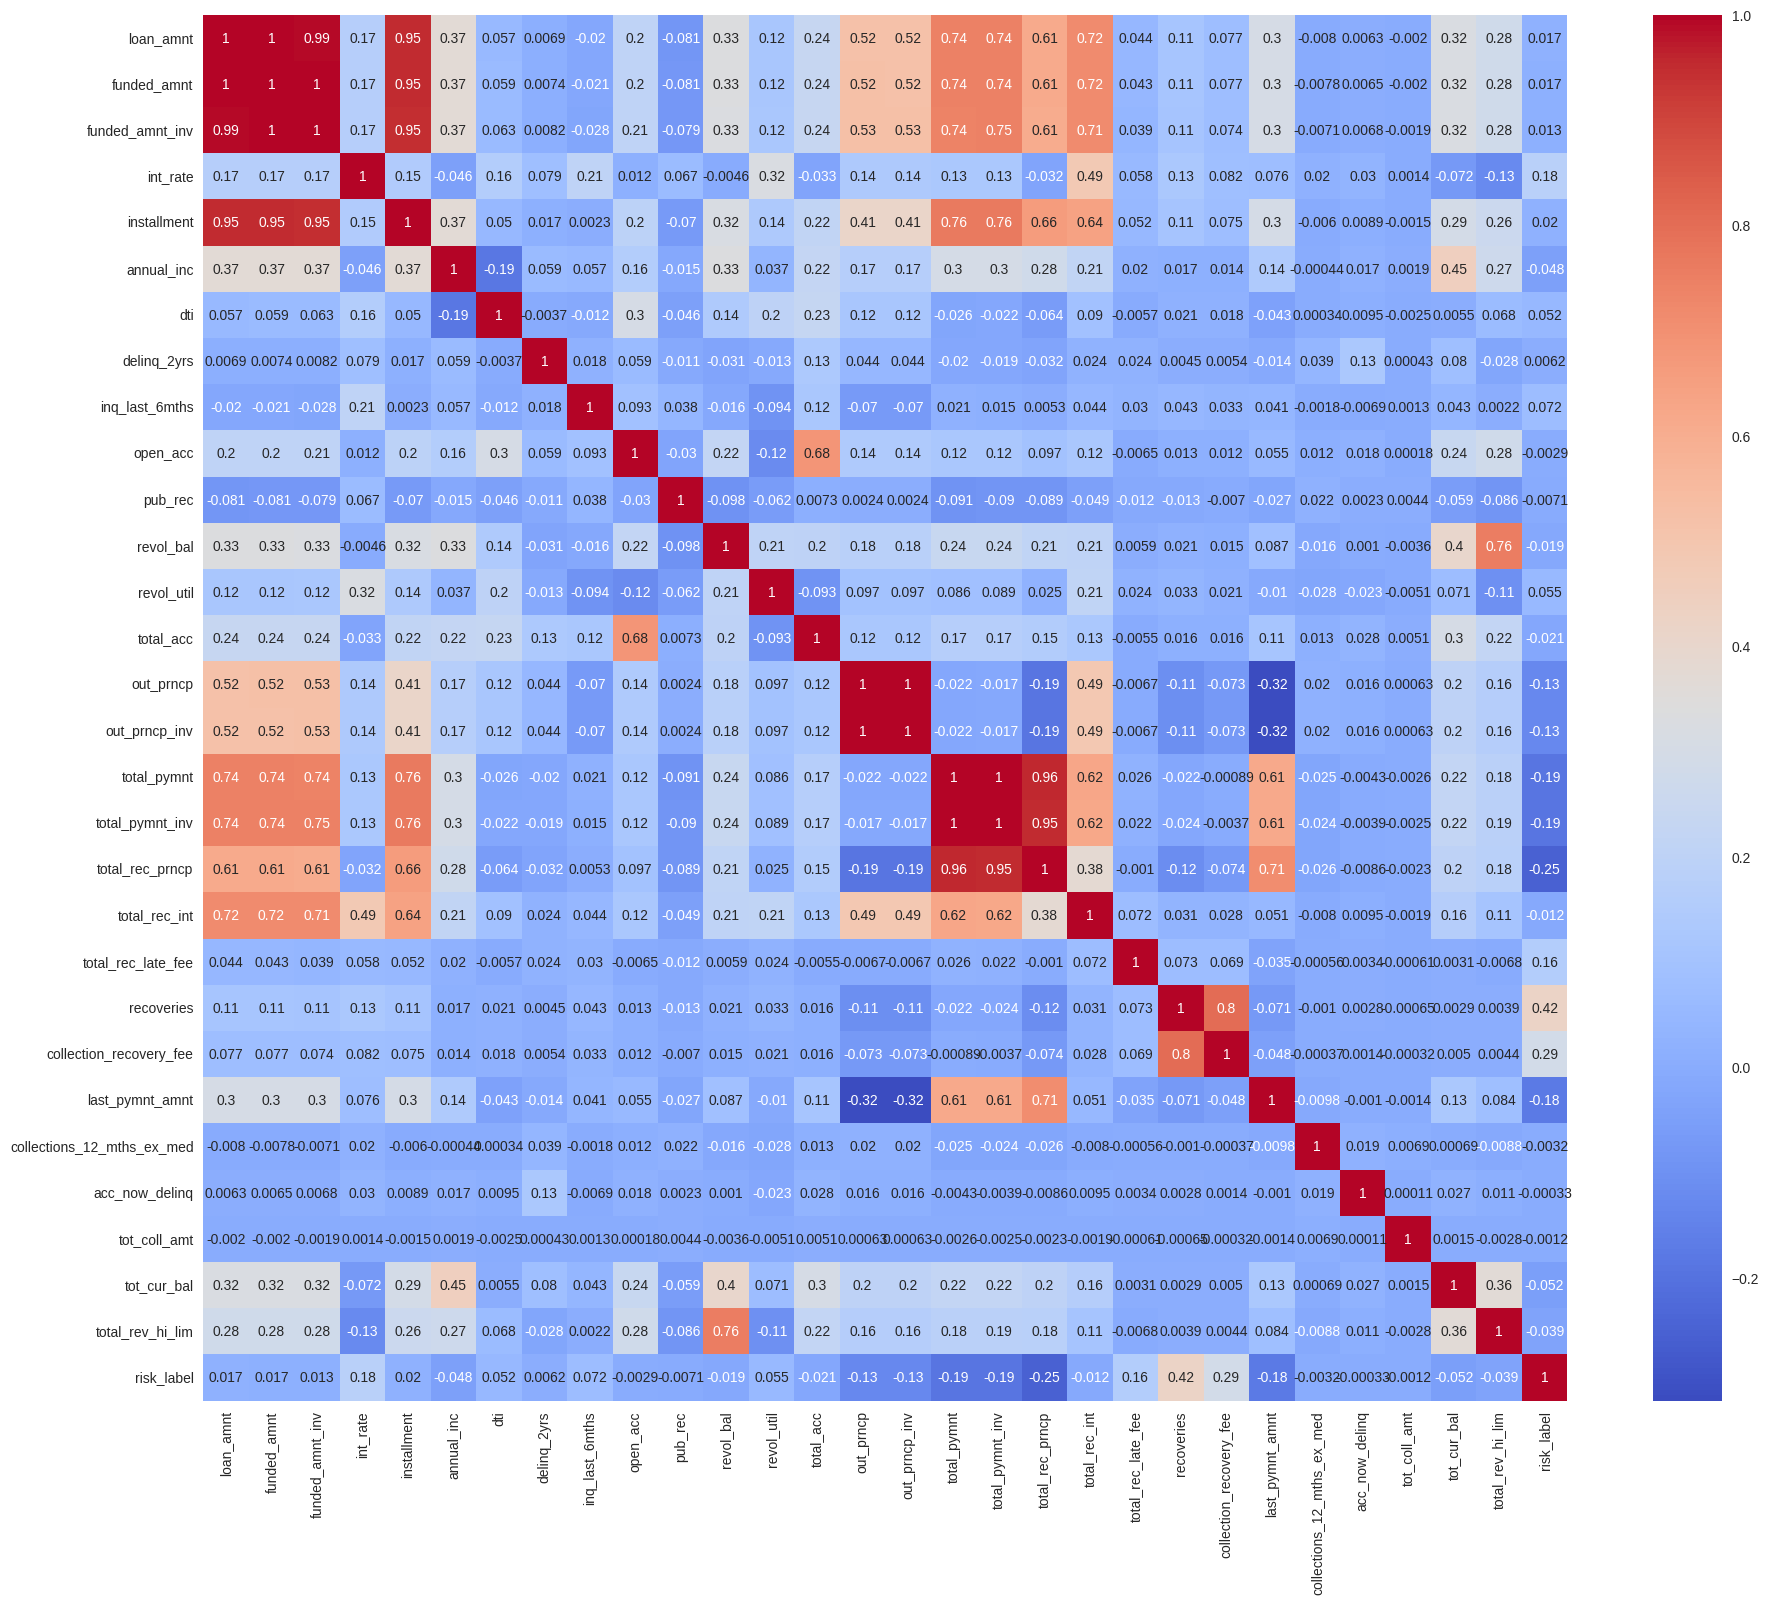

In [70]:
plt.figure(figsize=(22, 18))
sns.heatmap(data=corr, annot=True, cmap='coolwarm')

In [71]:
print("\nBASIC DATASET INFORMATION")
print("-" * 30)
print(f"Total Records: {len(data):,}")
print(f"Total Features: {data.shape[1]}")
print(f"Missing Values: {data.isnull().sum().sum():,}")
print(f"Duplicate Records: {data.duplicated().sum():,}")


BASIC DATASET INFORMATION
------------------------------
Total Records: 466,285
Total Features: 39
Missing Values: 0
Duplicate Records: 0


In [72]:
print(f"\nData Types:")
print(data.dtypes.value_counts())


Data Types:
float64    26
object      9
int64       4
Name: count, dtype: int64


In [73]:
print("\nMISSING VALUES ANALYSIS")
print("-" * 30)
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
if len(missing_data) > 0:
    missing_pct = (missing_data / len(data)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_data,
        'Percentage': missing_pct
    })
    print(missing_df.head(10))
else:
    print("No missing values found!")



MISSING VALUES ANALYSIS
------------------------------
No missing values found!


In [74]:
print("\nNUMERICAL FEATURES ANALYSIS")
print("-" * 30)
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical Features: {len(numerical_cols)}")


3. NUMERICAL FEATURES ANALYSIS
------------------------------
Numerical Features: 30


In [75]:
key_numerical = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util']
for col in key_numerical:
    if col in data.columns:
        print(f"\n{col.upper()}:")
        print(f"  Mean: {data[col].mean():.2f}")
        print(f"  Median: {data[col].median():.2f}")
        print(f"  Std: {data[col].std():.2f}")
        print(f"  Min-Max: {data[col].min():.2f} - {data[col].max():.2f}")


LOAN_AMNT:
  Mean: 14317.28
  Median: 12000.00
  Std: 8286.51
  Min-Max: 500.00 - 35000.00

INT_RATE:
  Mean: 13.83
  Median: 13.66
  Std: 4.36
  Min-Max: 5.42 - 26.06

ANNUAL_INC:
  Mean: 73277.29
  Median: 63000.00
  Std: 54963.34
  Min-Max: 1896.00 - 7500000.00

DTI:
  Mean: 17.22
  Median: 16.87
  Std: 7.85
  Min-Max: 0.00 - 39.99

REVOL_UTIL:
  Mean: 56.14
  Median: 57.50
  Std: 23.77
  Min-Max: 0.00 - 892.30


In [76]:
print("\nCATEGORICAL FEATURES ANALYSIS")
print("-" * 30)
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Features: {len(categorical_cols)}")

for col in ['grade', 'purpose', 'home_ownership', 'verification_status']:
    if col in data.columns:
        print(f"\n{col.upper()}:")
        value_counts = data[col].value_counts().head(5)
        for idx, count in value_counts.items():
            pct = (count / len(data)) * 100
            print(f"  {idx}: {count:,} ({pct:.1f}%)")


CATEGORICAL FEATURES ANALYSIS
------------------------------
Categorical Features: 9

GRADE:
  B: 136,929 (29.4%)
  C: 125,293 (26.9%)
  D: 76,888 (16.5%)
  A: 74,867 (16.1%)
  E: 35,757 (7.7%)

PURPOSE:
  debt_consolidation: 274,195 (58.8%)
  credit_card: 104,157 (22.3%)
  home_improvement: 26,537 (5.7%)
  other: 23,690 (5.1%)
  major_purchase: 9,828 (2.1%)

HOME_OWNERSHIP:
  MORTGAGE: 235,875 (50.6%)
  RENT: 188,473 (40.4%)
  OWN: 41,704 (8.9%)
  OTHER: 182 (0.0%)
  NONE: 50 (0.0%)

VERIFICATION_STATUS:
  Verified: 168,055 (36.0%)
  Source Verified: 149,993 (32.2%)
  Not Verified: 148,237 (31.8%)


## Visualization & Explanatory Analysis

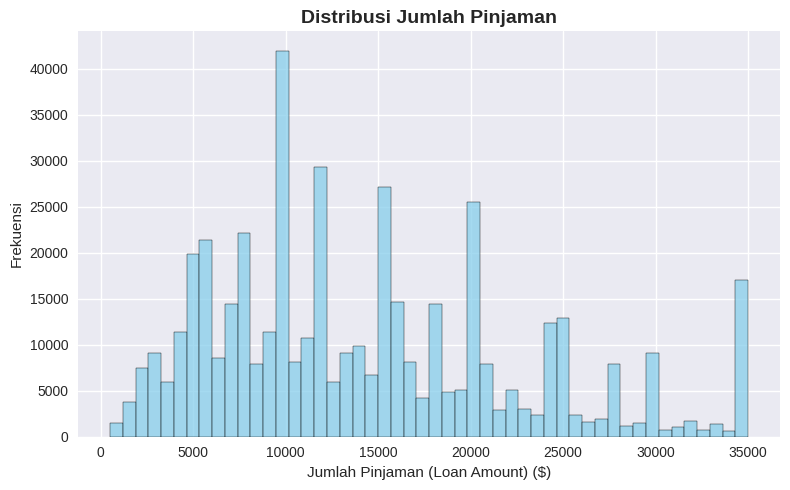

In [77]:
plt.figure(figsize=(8, 5))
sns.histplot(data['loan_amnt'], bins=50, color='skyblue', edgecolor='black', kde=False)

plt.xlabel('Jumlah Pinjaman (Loan Amount) ($)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jumlah Pinjaman', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

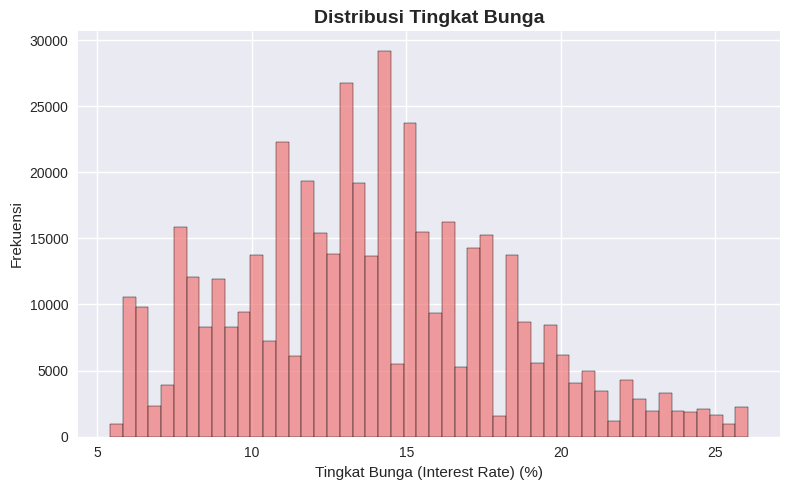

In [78]:
plt.figure(figsize=(8, 5))
sns.histplot(data['int_rate'], bins=50, color='lightcoral', edgecolor='black', kde=False)

plt.xlabel('Tingkat Bunga (Interest Rate) (%)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Tingkat Bunga', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

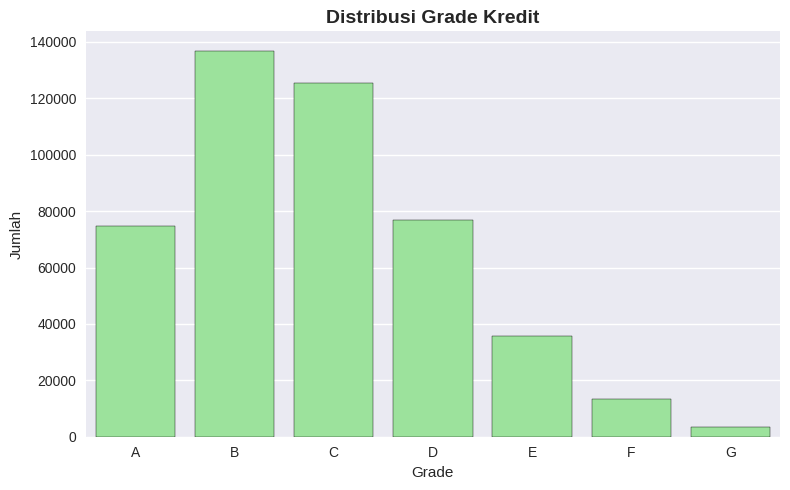

In [79]:
# Hitung jumlah grade dan urutkan
grade_counts = data['grade'].value_counts().sort_index()
grade_df = grade_counts.reset_index()
grade_df.columns = ['Grade', 'Count']

# Plot dengan seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=grade_df, x='Grade', y='Count', color='lightgreen', edgecolor='black')

plt.xlabel('Grade')
plt.ylabel('Jumlah')
plt.title('Distribusi Grade Kredit', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

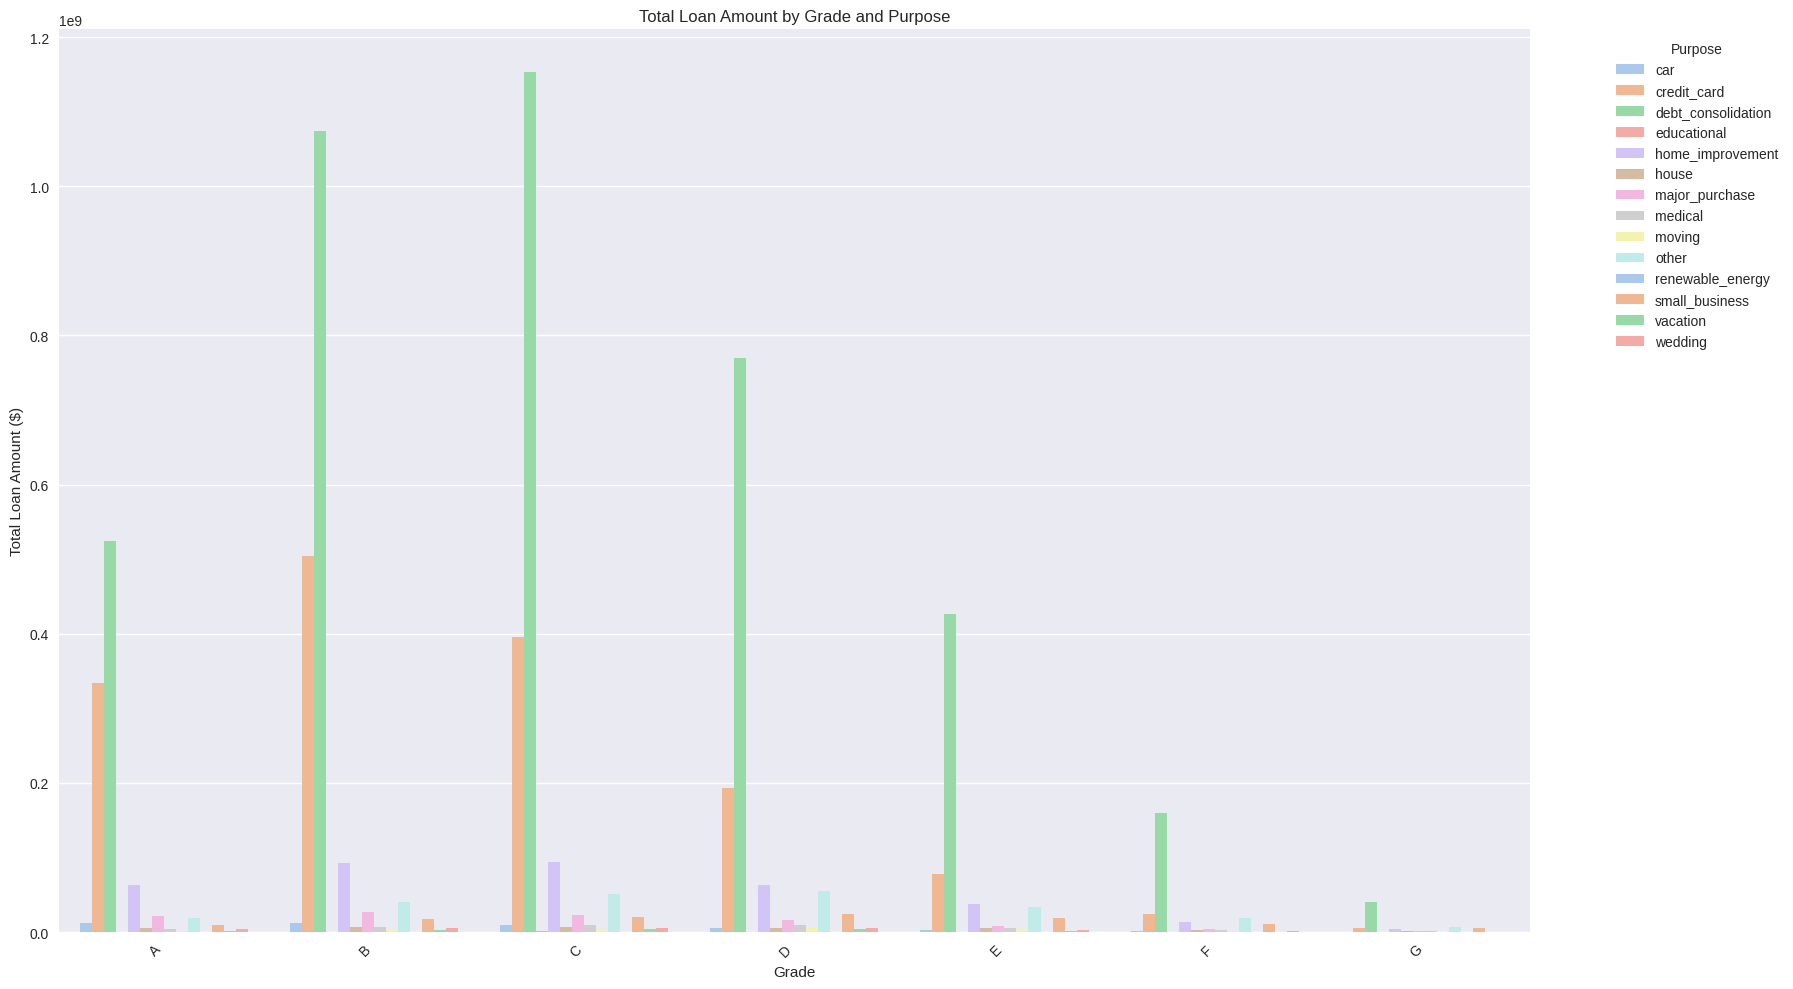

In [80]:
# Aggregate loan amount by grade and purpose
df_grouped = data.groupby(['grade', 'purpose'])['loan_amnt'].sum().reset_index()

# Create bar plot
plt.figure(figsize=(18, 10))
sns.barplot(data=df_grouped, x='grade', y='loan_amnt', hue='purpose', palette='pastel')
plt.xlabel('Grade')
plt.ylabel('Total Loan Amount ($)')
plt.title('Total Loan Amount by Grade and Purpose')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

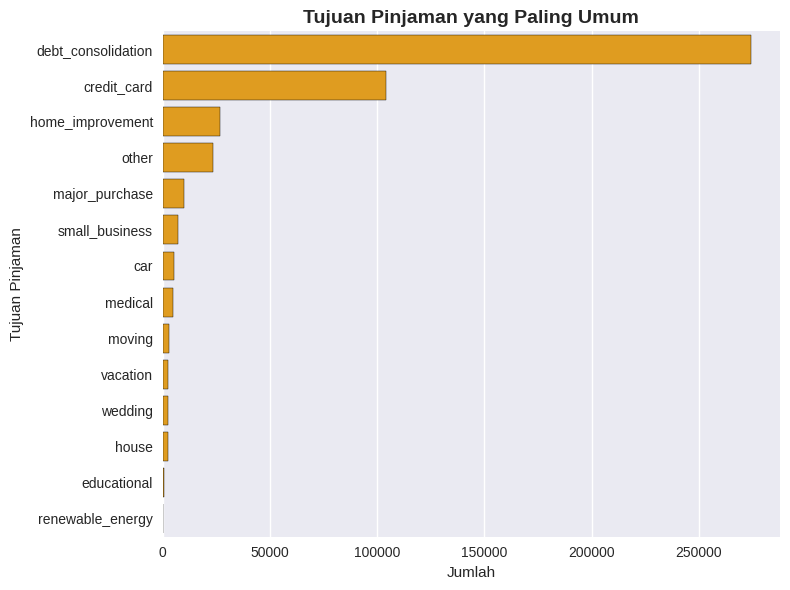

In [81]:
# Hitung dan urutkan jumlah tujuan pinjaman
purpose_counts = data['purpose'].value_counts(ascending=False)
purpose_df = purpose_counts.reset_index()
purpose_df.columns = ['Purpose', 'Count']

# Plot horizontal bar chart dengan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=purpose_df, x='Count', y='Purpose', color='orange', edgecolor='black')

plt.xlabel('Jumlah')
plt.ylabel('Tujuan Pinjaman')
plt.title('Tujuan Pinjaman yang Paling Umum', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

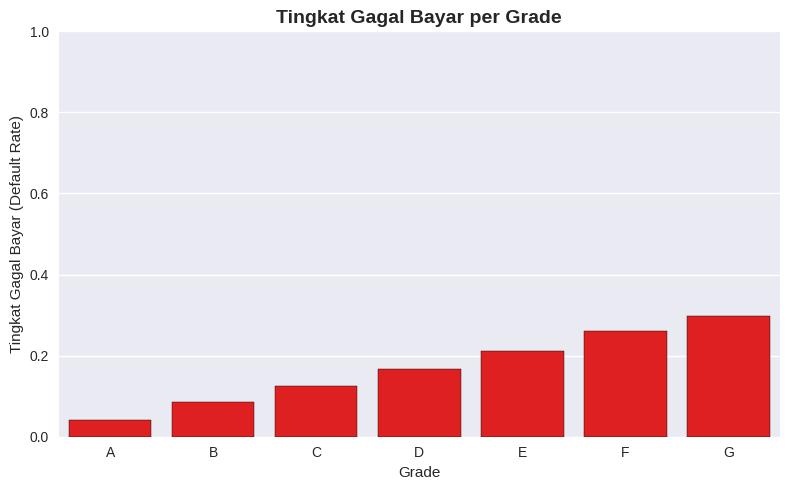

In [82]:
# Hitung rata-rata label risiko (asumsinya: 1 = default/buruk, 0 = baik)
risk_by_grade = data.groupby('grade')['risk_label'].mean().sort_index()
risk_df = risk_by_grade.reset_index()
risk_df.columns = ['Grade', 'Default_Rate']

# Plot dengan seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=risk_df, x='Grade', y='Default_Rate', color='red', edgecolor='black')

plt.xlabel('Grade')
plt.ylabel('Tingkat Gagal Bayar (Default Rate)')
plt.title('Tingkat Gagal Bayar per Grade', fontsize=14, fontweight='bold')
plt.ylim(0, 1)  # Default rate antara 0–1
plt.tight_layout()
plt.show()

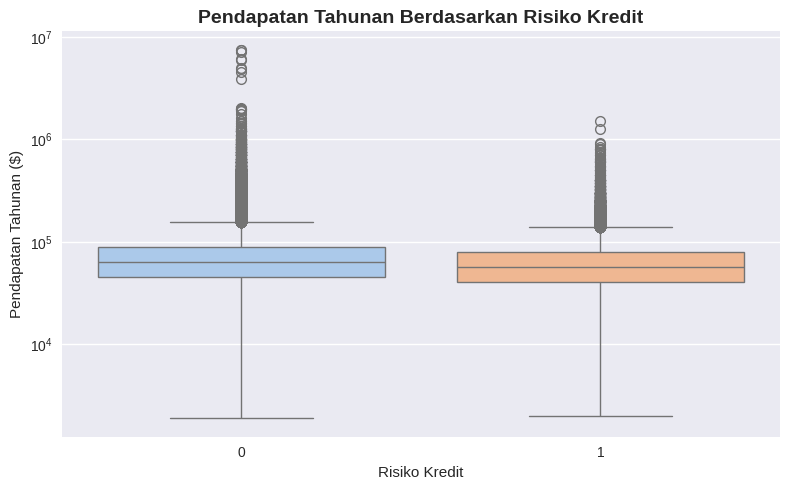

In [83]:
# Plot boxplot dengan seaborn
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='risk_label', y='annual_inc', palette='pastel')

plt.yscale('log')  # Skala logaritmik untuk mengatasi outlier
plt.xlabel('Risiko Kredit')
plt.ylabel('Pendapatan Tahunan ($)')
plt.title('Pendapatan Tahunan Berdasarkan Risiko Kredit', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

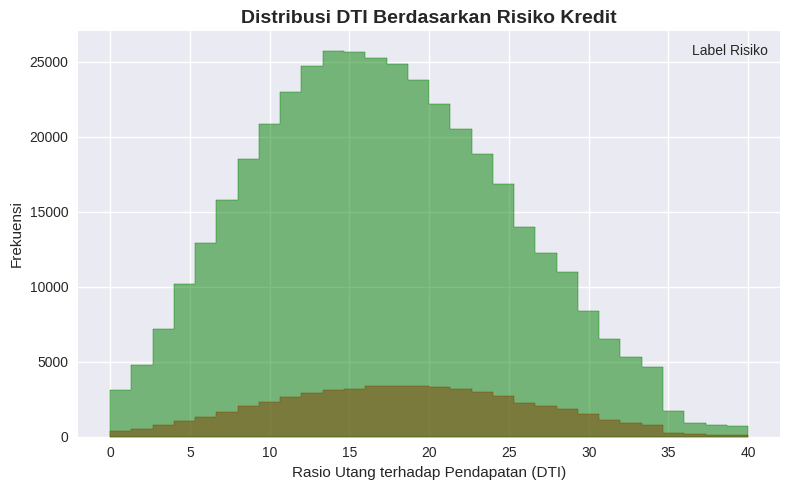

In [84]:
# Tambahkan label teks untuk risiko (jika belum)
data['risk_text'] = data['risk_label'].map({0: 'Good', 1: 'Bad'})

# Plot histogram menggunakan seaborn
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='dti', hue='risk_text', bins=30, element='step', stat='count', palette={'Good': 'green', 'Bad': 'red'}, alpha=0.5)

plt.xlabel('Rasio Utang terhadap Pendapatan (DTI)')
plt.ylabel('Frekuensi')
plt.title('Distribusi DTI Berdasarkan Risiko Kredit', fontsize=14, fontweight='bold')
plt.legend(title='Label Risiko')
plt.tight_layout()
plt.show()

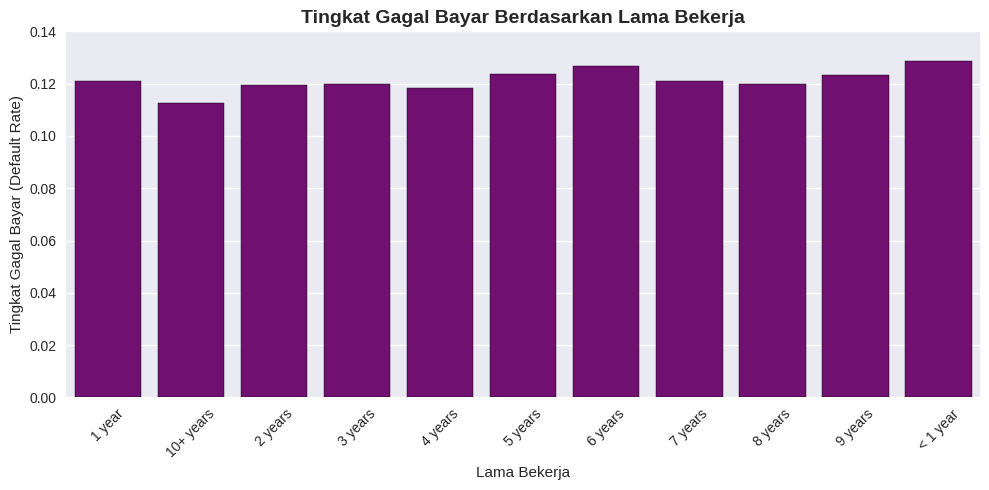

In [85]:
# Hitung rata-rata risiko berdasarkan panjang kerja
emp_risk = data.groupby('emp_length')['risk_label'].mean().reset_index()
emp_risk.columns = ['Employment Length', 'Default Rate']

# Plot dengan seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data=emp_risk, x='Employment Length', y='Default Rate', color='purple', edgecolor='black')

plt.xticks(rotation=45)
plt.ylabel('Tingkat Gagal Bayar (Default Rate)')
plt.xlabel('Lama Bekerja')
plt.title('Tingkat Gagal Bayar Berdasarkan Lama Bekerja', fontsize=14, fontweight='bold')
plt.ylim(0, 0.14)
plt.tight_layout()
plt.show()

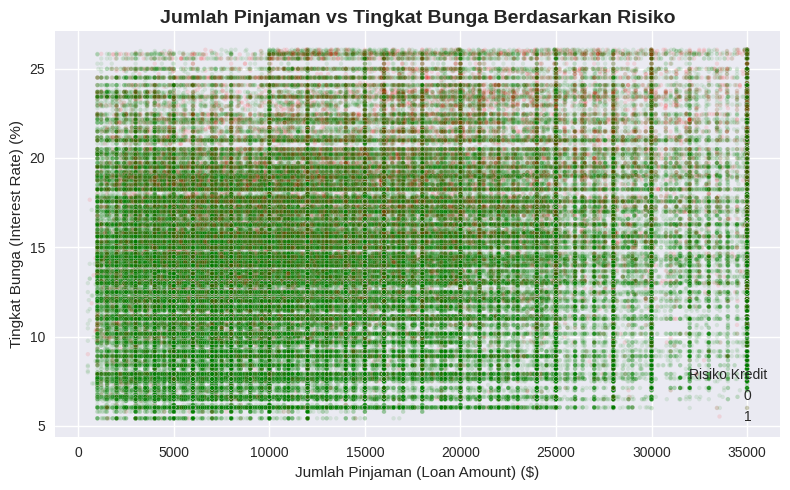

In [86]:
# Plot scatterplot dengan seaborn
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=data,
    x='loan_amnt',
    y='int_rate',
    hue='risk_label',
    palette={0: 'green', 1: 'red'},
    alpha=0.1,
    s=10
)

plt.xlabel('Jumlah Pinjaman (Loan Amount) ($)')
plt.ylabel('Tingkat Bunga (Interest Rate) (%)')
plt.title('Jumlah Pinjaman vs Tingkat Bunga Berdasarkan Risiko', fontsize=14, fontweight='bold')
plt.legend(title='Risiko Kredit')
plt.tight_layout()
plt.show()

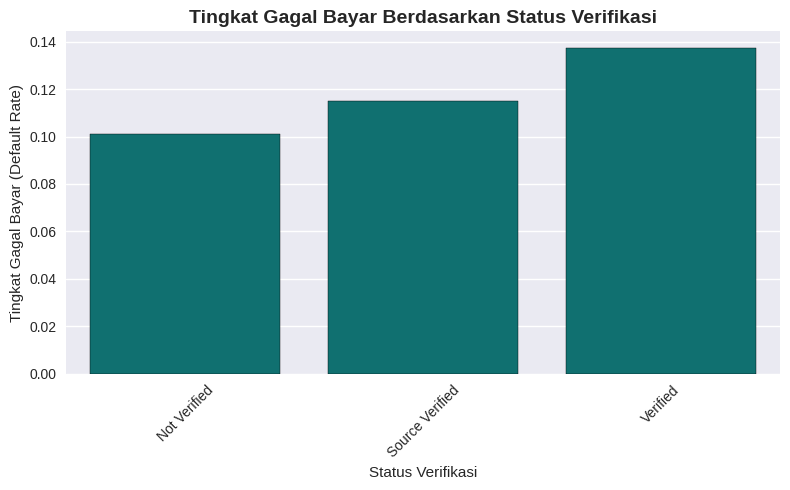

In [87]:
# Hitung rata-rata risiko berdasarkan status verifikasi
verif_risk = data.groupby('verification_status')['risk_label'].mean().reset_index()
verif_risk.columns = ['Verification Status', 'Default Rate']

# Plot dengan seaborn
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=verif_risk, x='Verification Status', y='Default Rate', color='teal', edgecolor='black')

plt.xlabel('Status Verifikasi')
plt.ylabel('Tingkat Gagal Bayar (Default Rate)')
plt.title('Tingkat Gagal Bayar Berdasarkan Status Verifikasi', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analisis Lanjutan (Data Modelling)

In [88]:
data_modelling = data.copy()

([<matplotlib.patches.Wedge at 0x7a4bd6e35a10>,
 [Text(-0.40064634989692927, -1.0244425324605904, 'Good'),
  Text(0.4006460160911609, 1.024442663007687, 'Bad')],
 [Text(-0.21853437267105233, -0.5587868358875946, '88.1%'),
  Text(0.21853419059517865, 0.5587869070951019, '11.9%')])

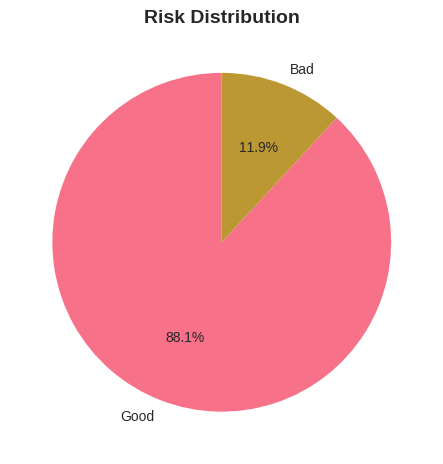

In [89]:
risk_counts = data_modelling['risk_label'].value_counts()
plt.title('Risk Distribution', fontsize=14, fontweight='bold')
plt.pie(x=risk_counts.values, labels=['Good', 'Bad'], autopct='%1.1f%%', startangle=90)

<Axes: xlabel='risk_label', ylabel='count'>

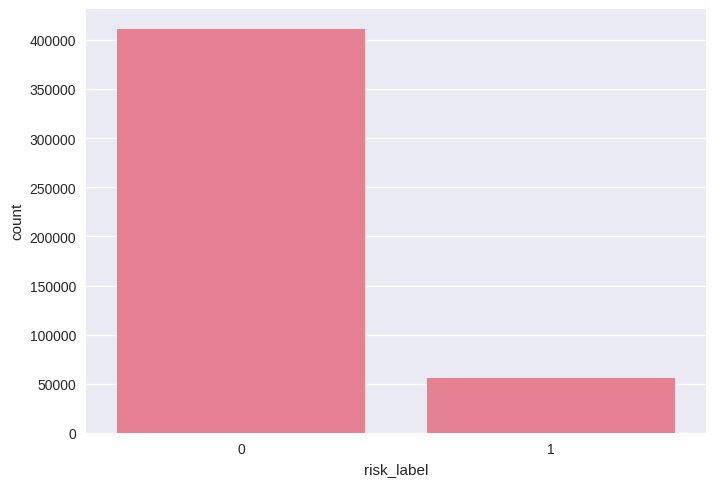

In [90]:
sns.countplot(data=data_modelling, x='risk_label')

In [91]:
look_object_in_data(data_modelling)

term : [' 36 months' ' 60 months']
grade : ['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade : ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
emp_length : ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']
home_ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status : ['Verified' 'Source Verified' 'Not Verified']
loan_status : ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
purpose : ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
addr_state : ['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX

In [92]:
# TERM (36 = 0, 60 = 1)
data_modelling['term'] = data_modelling['term'].map({' 36 months': 0, ' 60 months': 1})

# GRADE
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
grade_encoder = OrdinalEncoder(categories=[grade_order])
data_modelling['grade'] = grade_encoder.fit_transform(data_modelling[['grade']]).astype(int)

# EMP_LENGTH
emp_length_mapping = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10
}

data_modelling['emp_length'] = data_modelling['emp_length'].map(emp_length_mapping)

# HOME_OWNERSHIP
home_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Added handle_unknown and sparse_output
home_ownership_encoded = home_encoder.fit_transform(data_modelling[['home_ownership']]) # Reshape the input

home_ownership_df = pd.DataFrame(home_ownership_encoded, columns=home_encoder.get_feature_names_out(['home_ownership']), index=data_modelling.index)
data_modelling = pd.concat([data_modelling.drop('home_ownership', axis=1), home_ownership_df], axis=1)


# VERIFICATION_STATUS
verif_encoder = LabelEncoder()
data_modelling['verification_status'] = verif_encoder.fit_transform(data_modelling['verification_status'])

# PURPOSE
purpose_encoder = LabelEncoder()
data_modelling['purpose'] = purpose_encoder.fit_transform(data_modelling['purpose'])

In [93]:
# Separate features and target
X = data_modelling.drop(['risk_label', 'loan_status', 'sub_grade', 'addr_state', 'risk_text'], axis=1, errors='ignore')
y = data_modelling['risk_label']

# Select only numeric columns for modeling
numeric_cols = X.select_dtypes(include=[np.number]).columns
X = X[numeric_cols]

# Handle any remaining missing values
X = X.fillna(X.mean())

# Remove highly correlated features
corr_matrix = X.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
X = X.drop(to_drop, axis=1)

print(f"Features after correlation removal: {X.shape[1]}")
print(f"Features removed due to high correlation: {len(to_drop)}")

print(f"\nFinal feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Class distribution: {y.value_counts().to_dict()}")

Features after correlation removal: 33
Features removed due to high correlation: 7

Final feature matrix shape: (466285, 33)
Target variable shape: (466285,)
Class distribution: {0: 410953, 1: 55332}


In [94]:
from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_resampled)

print(f"\nTraining set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")


Training set: (583761, 33)
Test set: (145941, 33)

Features scaled successfully!


In [98]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'Neural Network': MLPClassifier(random_state=42, max_iter=500)
}

model_results = {}

for name, model in models.items():
    print(f"\n{'='*20} {name} {'='*20}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")


==================== Logistic Regression ====================
Accuracy: 0.9307
Precision: 0.9690
Recall: 0.9022
F1-Score: 0.9345
ROC-AUC: 0.9823

==================== Random Forest ====================
Accuracy: 0.9815
Precision: 0.9968
Recall: 0.9694
F1-Score: 0.9829
ROC-AUC: 0.9973

==================== Gradient Boosting ====================
Accuracy: 0.9670
Precision: 0.9968
Recall: 0.9428
F1-Score: 0.9691
ROC-AUC: 0.9932

==================== XGBoost ====================
Accuracy: 0.9840
Precision: 0.9981
Recall: 0.9727
F1-Score: 0.9852
ROC-AUC: 0.9965

==================== Neural Network ====================
Accuracy: 0.9692
Precision: 0.9889
Recall: 0.9545
F1-Score: 0.9714
ROC-AUC: 0.9934


In [99]:
comparison_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Accuracy': [r['accuracy'] for r in model_results.values()],
    'Precision': [r['precision'] for r in model_results.values()],
    'Recall': [r['recall'] for r in model_results.values()],
    'F1-Score': [r['f1'] for r in model_results.values()],
    'ROC-AUC': [r['roc_auc'] for r in model_results.values()]
})

print("\nModel Performance Comparison:")
print(comparison_df.round(4))

best_model_name = comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'Model']
best_model = model_results[best_model_name]['model']

print(f"\nBest Model: {best_model_name}")
print(f"Best ROC-AUC Score: {comparison_df['ROC-AUC'].max():.4f}")


Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Logistic Regression    0.9307     0.9690  0.9022    0.9345   0.9823
1        Random Forest    0.9815     0.9968  0.9694    0.9829   0.9973
2    Gradient Boosting    0.9670     0.9968  0.9428    0.9691   0.9932
3              XGBoost    0.9840     0.9981  0.9727    0.9852   0.9965
4       Neural Network    0.9692     0.9889  0.9545    0.9714   0.9934

Best Model: Random Forest
Best ROC-AUC Score: 0.9973


In [ ]:
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    model = RandomForestClassifier(random_state=42)

elif best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    }
    model = XGBClassifier(random_state=42, eval_metric='logloss')

elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
    model = GradientBoostingClassifier(random_state=42)

else:
    print(f"No tuning parameters defined for {best_model_name}")
    tuned_model = None

if best_model_name in ['Random Forest', 'XGBoost', 'Gradient Boosting']:
    print(f"Tuning {best_model_name}...")
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    tuned_model = grid_search.best_estimator_

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    y_pred_tuned = tuned_model.predict(X_test_scaled)
    y_pred_proba_tuned = tuned_model.predict_proba(X_test_scaled)[:, 1]

    tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
    tuned_precision = precision_score(y_test, y_pred_tuned)
    tuned_recall = recall_score(y_test, y_pred_tuned)
    tuned_f1 = f1_score(y_test, y_pred_tuned)
    tuned_roc_auc = roc_auc_score(y_test, y_pred_proba_tuned)

    print(f"\nTuned {best_model_name} Performance:")
    print(f"Accuracy: {tuned_accuracy:.4f}")
    print(f"Precision: {tuned_precision:.4f}")
    print(f"Recall: {tuned_recall:.4f}")
    print(f"F1-Score: {tuned_f1:.4f}")
    print(f"ROC-AUC: {tuned_roc_auc:.4f}")

Tuning Random Forest...


In [ ]:
final_model = tuned_model if 'tuned_model' in locals() and tuned_model else best_model

if hasattr(final_model, 'feature_importances_'):
    importances = final_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': importances
    }).sort_values('importance', ascending=False)

    print("Top Feature Importances:")
    print(feature_importance_df.head(15))

    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    plt.barh(top_features['feature'], top_features['importance'])
    plt.xlabel('Feature Importance')
    plt.title('Top 15 Feature Importances')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [ ]:
y_pred_final = final_model.predict(X_test_scaled)
y_pred_proba_final = final_model.predict_proba(X_test_scaled)[:, 1]

final_accuracy = accuracy_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final)
final_recall = recall_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)
final_roc_auc = roc_auc_score(y_test, y_pred_proba_final)

print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-Score: {final_f1:.4f}")
print(f"ROC-AUC: {final_roc_auc:.4f}")